In [54]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [14]:
master_df = pd.read_csv('CocaColaSwire.csv')

C:\Users\Owner\AppData\Local\Temp\ipykernel_9756\262964533.py:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv('CocaColaSwire.csv')


In [77]:
# GROUP 1: Matt, Alex, Carson
group_1_df = master_df.copy()

# GROUP 2: Nick S., Nick G.
group_2_df = master_df.copy()

In [80]:
#IMPORTANT
# REPLACE DF PLACEHOLDER
df_col_drop_lasso=group_2_df.drop(['ORDER_ID','PLANT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 
                                   'FUNCTIONAL_AREA_NODE_2_MODIFIED', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIP_VALID_TO', 'EXECUTION_START_DATE', 
                                   'EXECUTION_FINISH_DATE', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM', 'EQUIP_VALID_TO', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME'],axis=1)
#how to handle nodes? Equip start/vaid date?

df_filtered_lasso = df_col_drop_lasso.dropna(subset=['ORDER_DESCRIPTION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM','MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC', 'EQUIPMENT_ID'], how='all')

df_filtered_lasso.isnull().sum()/len(df_filtered_lasso)


PRODUCTION_LOCATION             0.000000
ACTUAL_WORK_IN_MINUTES          0.000000
MAINTENANCE_PLAN                0.477051
MAINTENANCE_ITEM                0.477051
MAINTENANCE_ACTIVITY_TYPE       0.000000
ORDER_DESCRIPTION               0.000096
MAINTENANCE_TYPE_DESCRIPTION    0.000000
FUNCTIONAL_LOC                  0.000045
EQUIPMENT_ID                    0.000000
EQUIPMENT_DESC                  0.727730
EQUIP_CAT_DESC                  0.727730
dtype: float64

In [81]:
# Create a new DataFrame by dropping rows with NaN values
group_2_df_cleaned = df_filtered_lasso.dropna()

# Verify that there are no NaN values remaining
print("Number of NaN values in each column:\n", group_2_df_cleaned.isna().sum())

# Display the new shape of the DataFrame
print("Original shape:", group_2_df.shape)
print("Shape after dropping NaNs:", group_2_df_cleaned.shape)


Number of NaN values in each column:
 PRODUCTION_LOCATION             0
ACTUAL_WORK_IN_MINUTES          0
MAINTENANCE_PLAN                0
MAINTENANCE_ITEM                0
MAINTENANCE_ACTIVITY_TYPE       0
ORDER_DESCRIPTION               0
MAINTENANCE_TYPE_DESCRIPTION    0
FUNCTIONAL_LOC                  0
EQUIPMENT_ID                    0
EQUIPMENT_DESC                  0
EQUIP_CAT_DESC                  0
dtype: int64
Original shape: (1427264, 25)
Shape after dropping NaNs: (57067, 11)


In [84]:
# Cleaning the data by droppping columns that have any Colinearity or columns with slim to no data.

df_col_drop_lasso=master_df.drop(['ORDER_ID','PLANT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_2_MODIFIED', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIP_VALID_TO', 'EXECUTION_START_DATE',
                                   'EXECUTION_FINISH_DATE', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM', 'EQUIP_VALID_TO', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME'],axis=1)

# Dropping rows with NaN values that wont work within the lasso regression

df_filtered_lasso = df_col_drop_lasso.dropna(subset=['ORDER_DESCRIPTION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM','MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC', 'EQUIPMENT_ID'], how='all')

df_filtered_lasso.isnull().sum()/len(df_filtered_lasso)

PRODUCTION_LOCATION             0.000000
ACTUAL_WORK_IN_MINUTES          0.000000
MAINTENANCE_PLAN                0.477051
MAINTENANCE_ITEM                0.477051
MAINTENANCE_ACTIVITY_TYPE       0.000000
ORDER_DESCRIPTION               0.000096
MAINTENANCE_TYPE_DESCRIPTION    0.000000
FUNCTIONAL_LOC                  0.000045
EQUIPMENT_ID                    0.000000
EQUIPMENT_DESC                  0.727730
EQUIP_CAT_DESC                  0.727730
dtype: float64

## Linear Regression

In [87]:
# Linear Regression
from sklearn.linear_model import LinearRegression


# Separate features and target variable
X = group_2_df_cleaned.drop(columns=["ACTUAL_WORK_IN_MINUTES"])  # All columns except the target
y = group_2_df_cleaned["ACTUAL_WORK_IN_MINUTES"]  # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1, 3, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


NameError: name 'np' is not defined


## Lasso Regression

In [ ]:

# Separate features and target variable
X = group_2_df_cleaned.drop(columns=["ACTUAL_WORK_IN_MINUTES"])  # All columns except the target
y = group_2_df_cleaned["ACTUAL_WORK_IN_MINUTES"]  # Target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numeric data: Standard scaling
# Preprocessing for categorical data: One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and Lasso regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Lasso Coefficients:", pipeline.named_steps['regressor'].coef_)


In [ ]:
# Get the feature names after preprocessing
feature_names = numeric_cols.tolist() + pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()

# Get the Lasso coefficients from the pipeline
lasso_coefficients = pipeline.named_steps['regressor'].coef_

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': lasso_coefficients})

# Filter out rows where the coefficient is zero
non_zero_coefficients_df = coefficients_df[coefficients_df['Lasso Coefficient'] != 0]

# Sort the DataFrame of non-zero coefficients in ascending order
sorted_coefficients_df = non_zero_coefficients_df.sort_values(by='Lasso Coefficient', ascending=True)

# Display the sorted non-zero coefficients 
print(sorted_coefficients_df)

In [91]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Print the sorted DataFrame with all rows
print(sorted_coefficients_df)

# Reset display option to default (if desired)
pd.reset_option('display.max_rows')


                                                Feature  Lasso Coefficient
2230  MAINTENANCE_TYPE_DESCRIPTION_Preventive Mainte...        -241.419394
3                             PRODUCTION_LOCATION_MONZA         -21.694279
1100                        MAINTENANCE_PLAN_G816SC1447         -14.781044
11                        MAINTENANCE_PLAN_000000022943         -12.316223
302                          MAINTENANCE_PLAN_G29160018         -10.482835
4                              PRODUCTION_LOCATION_ROMA          -9.770254
1604  ORDER_DESCRIPTION_KRONES LABELER #2 L3 FOR OPE...          -9.662708
2534       EQUIPMENT_DESC_L1 FILLER_ROTARY_BTL_60_VALVE          -9.596982
2311               FUNCTIONAL_LOC_G291-PRD-P05-XXX-S080          -9.547631
2254               FUNCTIONAL_LOC_G291-PRD-L15-L04-L070          -9.170004
17                        MAINTENANCE_PLAN_000000040761          -8.706682
1599  ORDER_DESCRIPTION_KRONES LABELER #1 L3 FOR OPE...          -8.207517
2018   ORDER_DESCRIPTION_

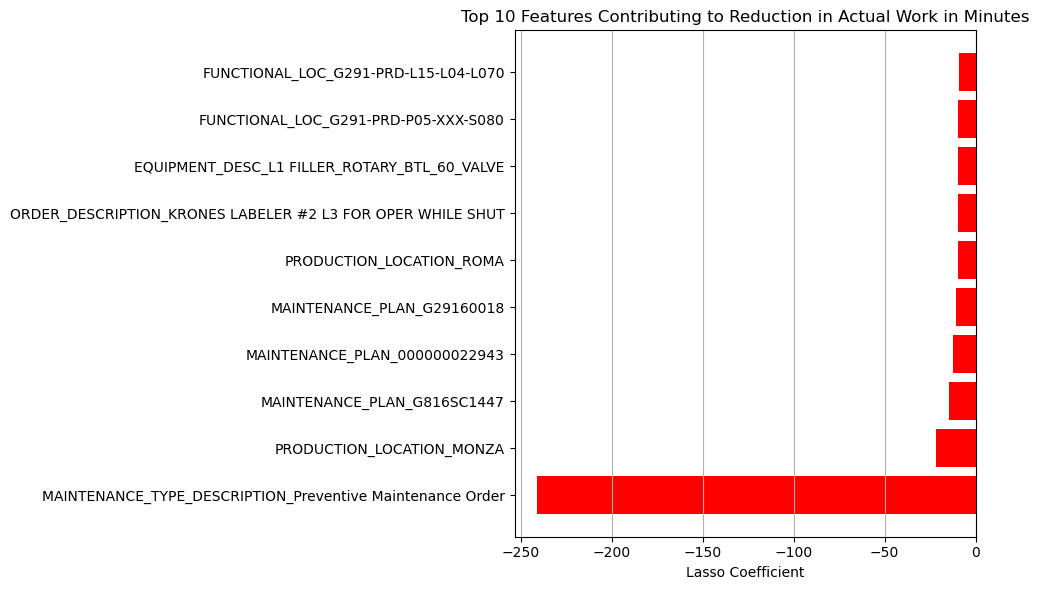

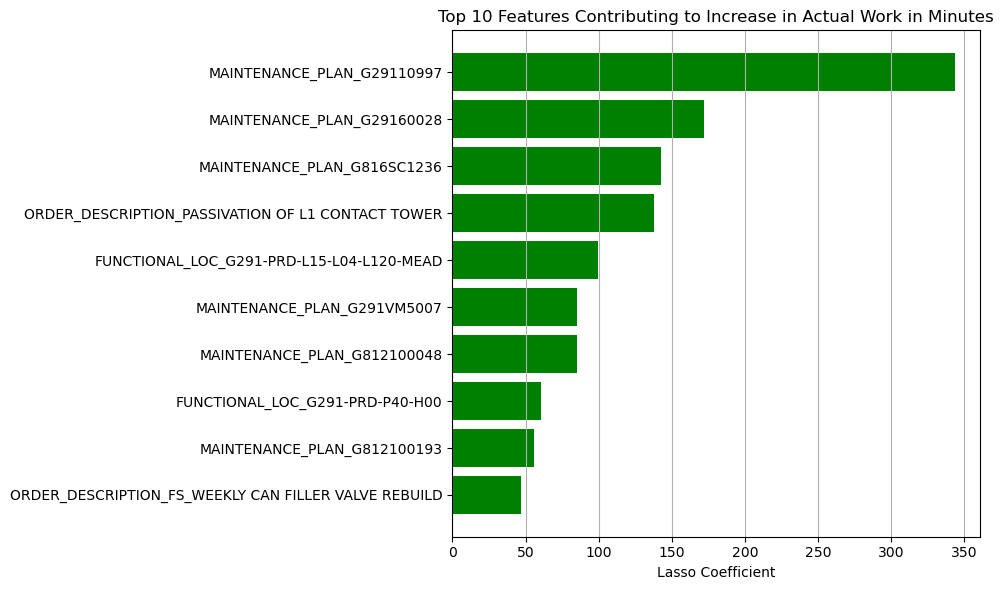

In [93]:
# Plot the top 10 rows contributing to reduction and increase in Actual Work in Minutes

# Top 10 negative coefficients (contributing to reduction in Actual Work in Minutes)
top_10_negative = sorted_coefficients_df.head(10)

# Top 10 positive coefficients (contributing to increase in Actual Work in Minutes)
top_10_positive = sorted_coefficients_df.tail(10)

# Plotting the top 10 negative coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_10_negative['Feature'], top_10_negative['Lasso Coefficient'], color='red')
plt.xlabel("Lasso Coefficient")
plt.title("Top 10 Features Contributing to Reduction in Actual Work in Minutes")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Plotting the top 10 positive coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_10_positive['Feature'], top_10_positive['Lasso Coefficient'], color='green')
plt.xlabel("Lasso Coefficient")
plt.title("Top 10 Features Contributing to Increase in Actual Work in Minutes")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [94]:
# Display the top 10 rows
print("Top 10 rows contributing to reduction of Actual Work in Minutes (smallest coefficients):")
print(sorted_coefficients_df.head(10))

# Display the bottom 10 rows
print("Top 10 rows contributing to increase of Actual Work in Minutes (largest coefficients):")
print(sorted_coefficients_df.tail(10))


Top 10 rows contributing to reduction of Actual Work in Minutes (smallest coefficients):
                                                Feature  Lasso Coefficient
2230  MAINTENANCE_TYPE_DESCRIPTION_Preventive Mainte...        -241.419394
3                             PRODUCTION_LOCATION_MONZA         -21.694279
1100                        MAINTENANCE_PLAN_G816SC1447         -14.781044
11                        MAINTENANCE_PLAN_000000022943         -12.316223
302                          MAINTENANCE_PLAN_G29160018         -10.482835
4                              PRODUCTION_LOCATION_ROMA          -9.770254
1604  ORDER_DESCRIPTION_KRONES LABELER #2 L3 FOR OPE...          -9.662708
2534       EQUIPMENT_DESC_L1 FILLER_ROTARY_BTL_60_VALVE          -9.596982
2311               FUNCTIONAL_LOC_G291-PRD-P05-XXX-S080          -9.547631
2254               FUNCTIONAL_LOC_G291-PRD-L15-L04-L070          -9.170004
Top 10 rows contributing to increase of Actual Work in Minutes (largest coefficients):

## Supervised Models Results

A linear regression and a lasso regression were run on the “cleaned” dataset that had redundant and colinear columns dropped. Once this was completed rows with null values were also dropped from the data since linear and lasso regression cannot handle null values. This left us with a dataset of 11 variables (including the target variable) and 57,067 entries. While this is substantially less than the original 1,427,264 entries, its more than enough to make a predictive model that allows us to draw insights from the data.  

The first model run was a linear regression. The results from the model are shown below:  

**Mean Squared Error (MSE):** 4567.599373513644  
**Root Mean Squared Error (RMSE):** 67.58401714542903  
**R-squared:** 0.47374201378670067  

While the linear model showed the ability to create accurate predictions and predict a significant amount of variance, we wanted a way to better understand what factors were contributing to the increase or decrease in “ACTUAL_WORK_IN_MINUTES”. For this we selected a Lasso regression. Even though the performance metrics of this model were slightly less accurate than the linear regression model, it provided meaningful insights into what variables contribute to variation in the target variable.

**Mean Squared Error (MSE):** 5168.628753236943  
**Root Mean Squared Error (RMSE):** 71.89317598518613  
**R-squared:** 0.40449414742120127

This model has the capability to highlight factors that contribute to the model’s predictive power while eliminating variables that are of no significance. The results from the lasso model are a list of coefficients with either a direct of inverse correlation to “ACTUAL_WORK_IN_MINUTES”. The lasso model selected 99 coefficients that have significant impact to the target variable. We examined the top ten coefficients that had a positive impact on “ACTUAL_WORK_IN_MINUTES” (reduced the time) and the bottom 10 coefficients that had a negative impact on “ACTUAL_WORK_IN_MINUTES” (increased the time).

**Comparison with the Baseline (Dummy Model)**

To understand if our models were performing well, we created a dummy model to check our results against. The dummy regression used a basic “mean” regression strategy as a naïve predictor for the target variable. This provided us with a useful benchmark for our models.  
The Dummy model (Baseline Mean Squared Error: 8679.41)
1.	Linear Regression MSE: 4567.60
2.	Lasso Regression MSE: 5168.63